| Var&$$(a, \sigma^2)$$| $$\gamma$$ | n | M | K | С.В. Z | С.В. W |
| --- | --- | --- | --- | --- | --- | --- |
| 5 (-1;16) | 0.9 | 16 | 1950 | 180 | $$Z =  \dfrac{(n-1)S^2}{\sigma^2} $$| $$W=\frac{1}{4}\sum_{i=1}^{4}U_i$$ $$Где\ U_i\ -\ случайная\ выборка\newline из\ 4\ значений\ св\ U,\newline имеющей\ распределение\ \chi^2(3)$$|


In [320]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import statistics

In [321]:
# consts
n = 16
a = -1
sigma = int(math.sqrt(16))
gamma = 0.9
M = 1950
K = 180

# n = 18
# a = 4
# sigma = math.sqrt(9)
# gamma = 0.99
# M = 2300
# K = 170


# Часть I





## 1.

In [322]:
# a =1 
# sigma = 2
# n = 500

sample = np.random.normal(loc=a, scale=sigma, size=n)

### 1.1 
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X известна

In [323]:
mean = statistics.mean(sample)
t = stats.norm.ppf((gamma/2)+0.5)
delta = t*sigma/math.sqrt(n)

In [324]:
print(f"Доверительный интервал для матожидания а \nпри известной дисперсии sigma = {sigma} при gamma = {gamma}: \n({mean - delta}, {mean + delta})")
print(f"Доверительный интервал by python: \n{stats.norm.interval(confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))}")

Доверительный интервал для матожидания а 
при известной дисперсии sigma = 4 при gamma = 0.9: 
(-3.7165146901767097, -0.42680743627376505)
Доверительный интервал by python: 
(-3.71651469017671, -0.42680743627376505)


### 1.2
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X НЕ известна

In [325]:
t = stats.t.ppf(((1+gamma)/2), df=n-1)
my_sigma = statistics.variance(sample)
delta = t*np.sqrt(my_sigma)/np.sqrt(n)
print(
    f"Доверительный интервал для матожидания а \nпри неизвестной дисперсии sigma = {sigma} при gamma = {gamma}: \n({mean - delta}, {mean + delta})")
print(
    f"Доверительный интервал by python: \n{stats.t.interval(gamma, df= n-1, loc=np.mean(sample), scale=np.sqrt(statistics.variance(sample))/np.sqrt(n))}")
# stats.sem - Calculate the standard error of the mean (or standard error of measurement) of the values in the input array.


Доверительный интервал для матожидания а 
при неизвестной дисперсии sigma = 4 при gamma = 0.9: 
(-3.5802356933236066, -0.5630864331268681)
Доверительный интервал by python: 
(-3.580235693323607, -0.5630864331268681)


### 1.3
Найти интервальную оценку (доверительный интервал) для дисперссии


In [326]:
def estimation_of_variance(sample, n_points, n_gamma):
    q1 = (1 - n_gamma)/2
    q2 = (1 + n_gamma)/2
    xq1 = stats.chi2(n_points-1).ppf(q1)
    xq2 = stats.chi2(n_points-1).ppf(q2)
    return ((n_points-1)*statistics.variance(sample)/xq2, (n_points-1)*statistics.variance(sample)/xq1)


print(
    f"Доверительный интервал для дисперсии sigma при gamma = {gamma}: {estimation_of_variance(sample, n, gamma)})")

Доверительный интервал для дисперсии sigma при gamma = 0.9: (7.110320698168016, 24.47726986573874))


## 2
Зависимость длины доверительного интервала от надежности при неизменном объеме выборки

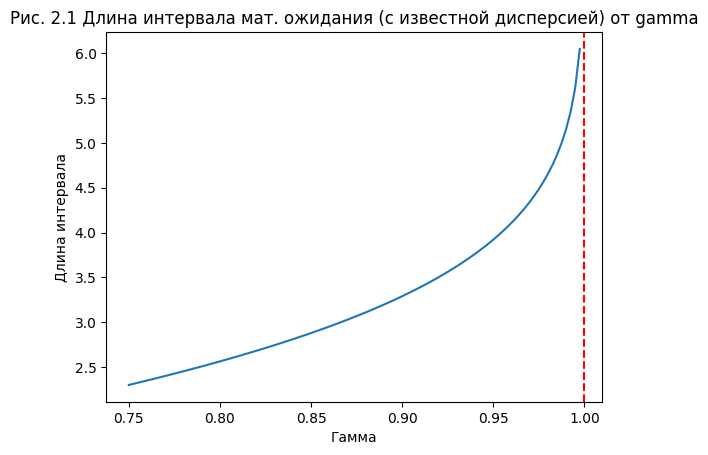

In [327]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma_tmp = gamma_0+i*h
    tmp = stats.norm.interval(
        confidence=gamma_tmp, loc=sample.mean(), scale=sigma/math.sqrt(n))
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma_tmp)

plt.plot(arr_gamma, bounds)
plt.title(f'Рис. 2.1 Длина интервала мат. ожидания (с известной дисперсией) от gamma')
plt.xlabel('Гамма')
plt.ylabel('Длина интервала')
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

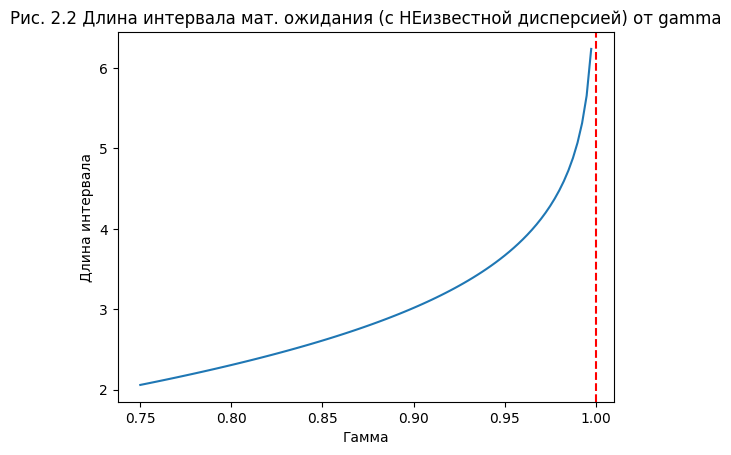

In [328]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma_tmp = gamma_0+i*h
    tmp = stats.t.interval(gamma_tmp, df=n-1, loc=np.mean(sample),
                           scale=np.sqrt(statistics.variance(sample))/np.sqrt(n))
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma_tmp)

plt.plot(arr_gamma, bounds)
plt.title(f'Рис. 2.2 Длина интервала мат. ожидания (с НЕизвестной дисперсией) от gamma')
plt.xlabel('Гамма')
plt.ylabel('Длина интервала')
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

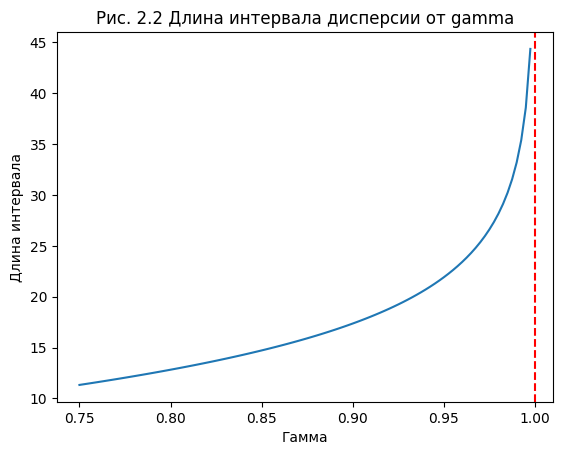

In [329]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma_tmp = gamma_0+i*h
    tmp = estimation_of_variance(sample, n, gamma_tmp)
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma_tmp)

plt.plot(arr_gamma, bounds)
plt.title(f'Рис. 2.2 Длина интервала дисперсии от gamma')
plt.xlabel('Гамма')
plt.ylabel('Длина интервала')
plt.axvline(x=1, color='red', label='axvline - full height', linestyle='--')

## 3
Построить зависимость длины доверительного интервала от объема выборки при неизменной надежности

Text(0.5, 1.0, 'Рис. 3.1 Длина интервала мат. ожидания c известной дисперсией')

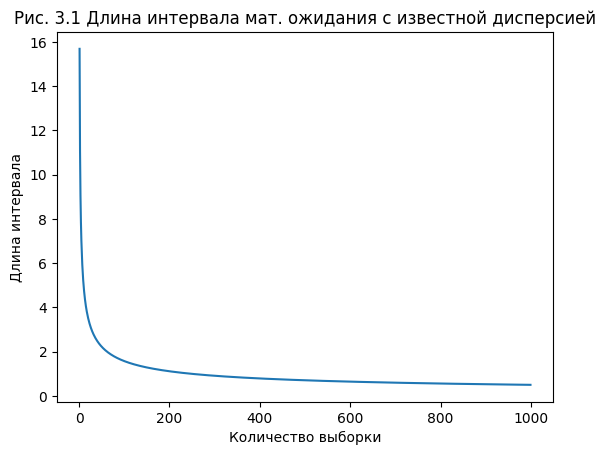

In [330]:
gamma_2 = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(1, 1000):
    sample_tmp = np.random.normal(loc=a, scale=sigma, size=i)
    tmp = stats.norm.interval(
        confidence=gamma_2, loc=np.mean(sample_tmp), scale=sigma/math.sqrt(i))
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)


plt.plot(arr_len, bounds)
plt.xlabel('Количество выборки')
plt.ylabel('Длина интервала')
plt.title(f'Рис. 3.1 Длина интервала мат. ожидания c известной дисперсией')

Text(0.5, 1.0, 'Рис. 3.2 Длина интервала мат. ожидания c неизвестной дисперсией')

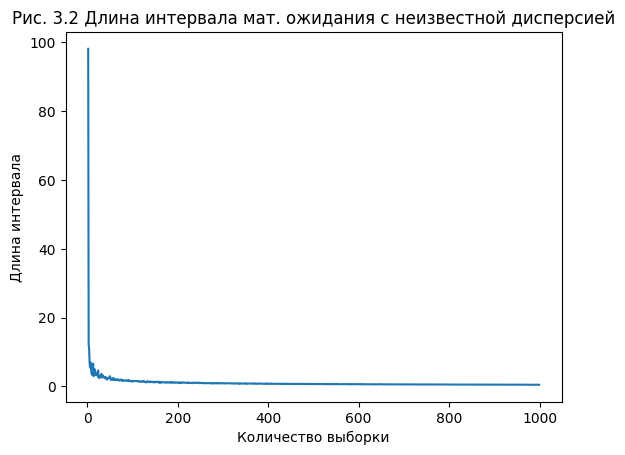

In [331]:
gamma_2 = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(2, 1000):
    sample_tmp = np.random.normal(loc=a, scale=sigma, size=i)
    
    tmp = stats.t.interval(gamma_2, df=i-1, loc=np.mean(sample_tmp),
                           scale=np.sqrt(statistics.variance(sample_tmp))/np.sqrt(i))
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)


plt.plot(arr_len, bounds)
plt.xlabel('Количество выборки')
plt.ylabel('Длина интервала')
plt.title(f'Рис. 3.2 Длина интервала мат. ожидания c неизвестной дисперсией')

Text(0.5, 1.0, 'Зависимость ширины интервала от длины выборки (дисперсия)')

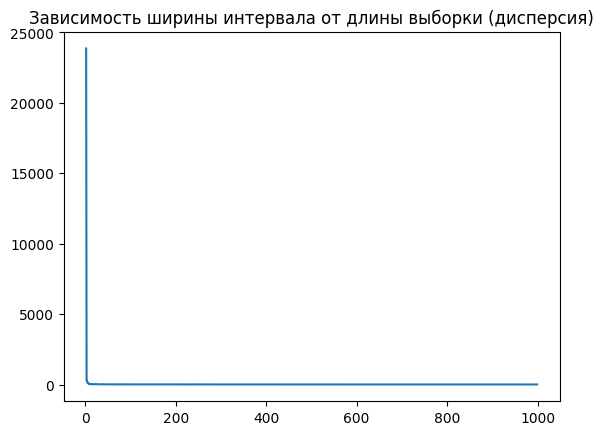

In [332]:
gamma_2 = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(2, 1000):
    sample_tmp = np.random.normal(loc=a, scale=sigma, size=i)
    tmp = estimation_of_variance(sample_tmp, i, gamma_2)
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)

plt.plot(arr_len, bounds)
plt.title("Зависимость ширины интервала от длины выборки (дисперсия)")

In [333]:
stats.t.interval(confidence=0.95, df=len(sample)-1,
                 loc=np.mean(sample), scale=stats.sem(sample))

(-3.9058643417130403, -0.2374577847374344)

## 4
Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a, sigma^2)

In [334]:
bounds.clear()
l = []
r = []
for i in range(M):
    sample_tmp = np.random.normal(loc=a, scale=sigma, size=n)
    tmp = stats.t.interval(gamma, df=n-1, loc=np.mean(sample_tmp),
                           scale=np.sqrt(statistics.variance(sample_tmp))/np.sqrt(n))
    bounds.append(tmp)
    l.append(tmp[0])
    r.append(tmp[1])
x_l = pd.Series(data=l)
x_r = pd.Series(data=r)

count = ((x_l < a) & (x_r > a)).sum()
print(f"Оценка гамма = {count/M}")
print(f"Гамма: {gamma}")

Оценка гамма = 0.9061538461538462
Гамма: 0.9


## 5 
Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (a, sigma^2)
### 5.1
По каждой из M выборок найти наблюдаемое значение случайной величины Z
(описание случайной величины Z приведено в Вашем варианте)



In [335]:
sample_z = []
for i in range(M):
    sample_i = np.random.normal(loc=a, scale=sigma, size=n)
    s2_i = statistics.variance(sample_i)
    sample_z.append((n-1)*s2_i/sigma**2)

### 5.2
Каков закон распределения случайной величины Z? 

В силу теоремы фишера - хи квадрат (n-1)

### 5.3
По выборке из M значений случайной величины Z найти выборочные числовые
характеристики ее распределения.


In [336]:
my_mean_z = statistics.mean(sample_z)
my_variacne_z = statistics.variance(sample_z) #Несмещенная дисперсия
my_pvariance_z = statistics.pvariance(sample_z) #Смещенная дисперсия
my_dev_z = math.sqrt(my_variacne_z)
my_skewness_z = stats.skew(sample_z)
my_kurtosis_z = stats.kurtosis(sample_z)
print(f'mean - {my_mean_z}, \nvariacne - {my_variacne_z}, \ndev - {my_dev_z}, \nSkewness - {my_skewness_z}, \nKurtosis - {my_kurtosis_z}')
print (f'Pvariance - {my_pvariance_z}')

mean - 14.937638675414496, 
variacne - 29.934010546774992, 
dev - 5.471198273392675, 
Skewness - 0.7047784781672511, 
Kurtosis - 0.7061502185848245
Pvariance - 29.91865977213562


### 5.4 
Построить гистограмму относительных частот и теоретическую кривую
распределения случайной величины Z, а также ящичковую диаграмму

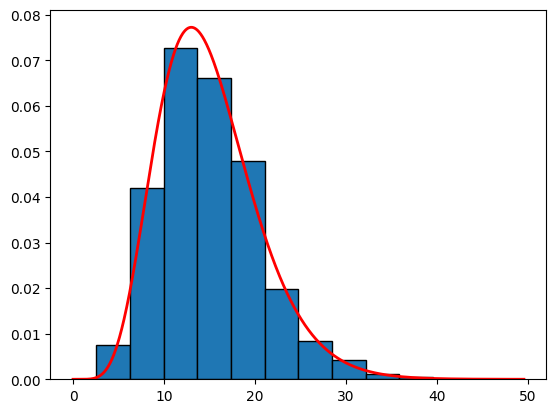

In [337]:
plt.hist(sample_z, edgecolor="black", density=True)
x = np.linspace(0, max(sample_z)+10, 1000)
y = stats.chi2.pdf(x, df=n-1)
plt.plot(x, y, color="r", lw=2)

x = np.linspace(0, max(sample_z) + 10, 1000)
pdf = stats.chi2.pdf(x, n-1)



plt.show()

,0
0.25,10.946072
0.50,14.411038
0.75,18.282310


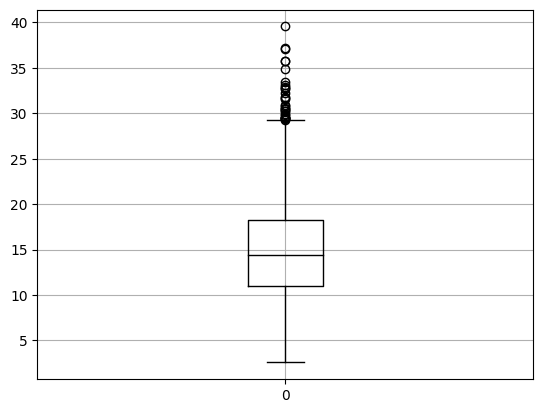

In [338]:
data = pd.DataFrame(sample_z)
data.boxplot(color = "black")
data.quantile([0.25, 0.5, 0.75])


# II часть

## 1
Смоделировать M выборок из n значений нормально распределенной случайной
величины X с параметрами (a,sigma^2). По каждой из M выборок с надежностью gamma найти
интервальную оценку (доверительный интервал) для дисперсии случайной величины X

In [339]:
bounds_sigma = []
l_sigma = []
r_sigma = []
samples = np.random.normal(a, sigma, (M, n))
for sample_i in samples:
    tmp = estimation_of_variance(sample_i, n, gamma)
    bounds_sigma.append(tmp)
    l_sigma.append(tmp[0])
    r_sigma.append(tmp[1])
x_l_sigma = pd.Series(data=l_sigma)
x_r_sigma = pd.Series(data=r_sigma)
print(sigma)
count = ((x_l_sigma < sigma) & (x_r_sigma > sigma)).sum()
print(f"Оценка гамма = {count/M}")
print(f"Гамма: {gamma}")
    

4
Оценка гамма = 0.024102564102564103
Гамма: 0.9
